Exploring input gradient ascent and input data spaces for fully connected networks with tabular data

Jordan Perr-Sauer 2022

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dmp.data.pmlb import pmlb_loader
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import sys
sys.path.append("..")

from networks import get_basic_537_houses
from viz import *

In [3]:
model, inputs, outputs = get_basic_537_houses(num_hidden_layers=6, hidden_layer_width=128)

(20640, 8)
array([[0.90226638],
       [0.70824656],
       [0.69505074],
       ...,
       [0.15938285],
       [0.14371281],
       [0.15340349]])
(20640, 1)
num_observations 20640 num_inputs 8 num_outputs 1
Epoch 1/100
65/65 [==============================] - 1s 13ms/step - loss: 0.0454 - val_loss: 0.0190
Epoch 2/100
65/65 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.0206
Epoch 3/100
65/65 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0182
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.0172
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0172
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0168
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0184
Epoch 8/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.0

(array([ 877., 3612., 4099., 3771., 2804., 1764., 1239.,  752.,  479.,
        1243.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

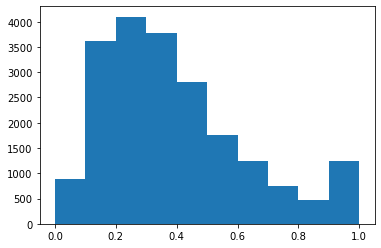

In [5]:
plt.hist(outputs)

In [6]:
inputs.shape

(20640, 8)

In [10]:
inputs

array([[0.53966842, 0.78431373, 0.02233074, ..., 0.02055583, 0.56748143,
        0.21115487],
       [0.53802707, 0.39215686, 0.18050257, ..., 0.18697583, 0.56535598,
        0.2121511 ],
       [0.46602805, 1.        , 0.03726029, ..., 0.02894261, 0.56429305,
        0.2101594 ],
       ...,
       [0.08276438, 0.31372549, 0.05727657, ..., 0.07104095, 0.73219973,
        0.31175269],
       [0.09429525, 0.33333333, 0.04725571, ..., 0.05722743, 0.73219973,
        0.30179268],
       [0.13025338, 0.29411765, 0.07078183, ..., 0.08699227, 0.72582339,
        0.30976099]])

In [13]:
X = np.linspace(-0.5,1.5,100)
Y = X
XX,YY = np.meshgrid(X,Y)
Z = model

array([[-0.5       , -0.47979798, -0.45959596, ...,  1.45959596,
         1.47979798,  1.5       ],
       [-0.5       , -0.47979798, -0.45959596, ...,  1.45959596,
         1.47979798,  1.5       ],
       [-0.5       , -0.47979798, -0.45959596, ...,  1.45959596,
         1.47979798,  1.5       ],
       ...,
       [-0.5       , -0.47979798, -0.45959596, ...,  1.45959596,
         1.47979798,  1.5       ],
       [-0.5       , -0.47979798, -0.45959596, ...,  1.45959596,
         1.47979798,  1.5       ],
       [-0.5       , -0.47979798, -0.45959596, ...,  1.45959596,
         1.47979798,  1.5       ]])

Plot the input space around the data domain. The red box shows the cube containing the input data. An extra 50% around each side is allowed to show extreme generalization properties.

In [44]:
from matplotlib.patches import Rectangle

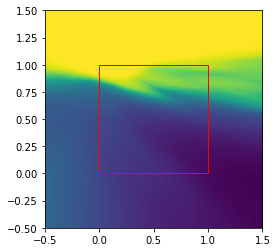

In [47]:
input = np.pad(np.array([XX.flatten(), YY.flatten()]).T, [(0,0), (3,3)])
output = model.predict(input)
output = output.reshape((XX.shape))

plt.imshow(output, extent=[-0.5,1.5,-0.5,1.5])

# Add the patch to the Axes
rect = Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
ax = plt.gca()
ax.add_patch(rect)

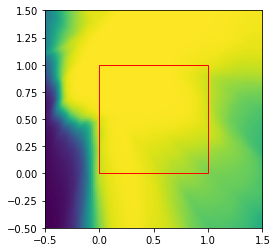

In [49]:
input = np.pad(np.array([XX.flatten(), YY.flatten()]).T, [(0,0), (2,4)])
output = model.predict(input)
output = output.reshape((XX.shape))

plt.imshow(output, extent=[-0.5,1.5,-0.5,1.5])

# Add the patch to the Axes
rect = Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
ax = plt.gca()
ax.add_patch(rect)

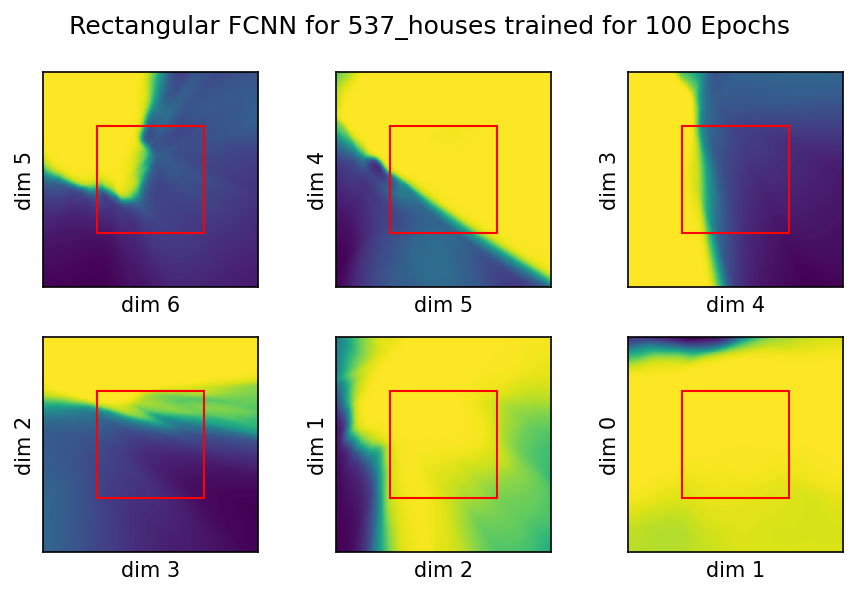

In [65]:
fig = plt.figure(dpi=150)

for a in range(6):
    input = np.pad(np.array([XX.flatten(), YY.flatten()]).T, [(0,0), (6-a,a)])
    output = model.predict(input)
    output = output.reshape((XX.shape))

    plt.subplot(2,3,a+1)
    plt.imshow(output, extent=[-0.5,1.5,-0.5,1.5])

    # Add the patch to the Axes
    rect = Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
    ax = plt.gca()
    ax.add_patch(rect)
    #plt.axis('off')
    plt.ylabel(f"dim {6-a-1}")
    plt.xlabel(f"dim {6-a}")
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Rectangular FCNN for 537_houses trained for 100 Epochs")
plt.tight_layout()
plt.show()